# Exploratory data analysis
**Describing, visualizing, correlation analysis, hyphothesis testing**

**Import** data from "data/cleaned.csv"

In [1]:
# Setup

import numpy as np
import pandas as pd

from pkg import utils
from pkg import plot

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Importing data

parent = 'data'
filename = 'cleaned.csv'

path = utils.get_path(parent,filename)

df = pd.read_csv(path, index_col=0)

In [3]:
# Importing data standardized

parent = 'data'
filename = 'cleaned_standardized.csv'

path = utils.get_path(parent,filename)

df_stand = pd.read_csv(path, index_col=0)

In [4]:
# Configurations

save_dists = False

# Descriptive analysis

In [5]:
print(f"Those data have {df.shape[0]} rows and {df.shape[1]} columns\n")
df.head()

Those data have 47422 rows and 16 columns



,TIPO_RELACIONAMENTO,ESTADO_LOJA,CATEGORIA_PRODUTO,RENDA_ESPERADA,ESTRATEGIA_VENDAS,AVAL_SATISFACAO,VL_LIMITE_CREDITO_INICIAL_BANCO,REGIAO_LOJA,VL_FINANCEIRO_BCB,VL_OPERACAO_CARTAO_CREDITO,VL_LIMITE_CREDITO_BCB,PONTUACAO_DESEMPENHO,TEMPO_EXISTENCIA_ONLINE,AVALIACAO_RISCO,SCORE_INTERNO,RENDA
ID_LOJA,,,,,,,,,,,,,,,,
922686,2,19,0,2199000.0,0,7.31,60000.0,2,4265800.0,3546400.0,719400.0,792.0,37.0,300.0,528.0,242400.0
938287,1,4,5,300000.0,2,3.57,50000.0,2,168700.0,49500.0,500.0,392.0,22.0,300.0,555.0,235100.0
939120,2,5,0,650000.0,1,5.08,40000.0,2,125900.0,90900.0,35000.0,653.0,27.0,300.0,555.0,420600.0
933554,1,25,5,300000.0,0,6.29,160000.0,4,1417900.0,379200.0,18900.0,579.0,33.0,150.0,555.0,340600.0
948294,2,25,0,1200000.0,2,9.23,60000.0,4,402000.0,206800.0,195100.0,792.0,30.0,300.0,555.0,456900.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47422 entries, 922686 to 937105
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TIPO_RELACIONAMENTO              47422 non-null  int64  
 1   ESTADO_LOJA                      47422 non-null  int64  
 2   CATEGORIA_PRODUTO                47422 non-null  int64  
 3   RENDA_ESPERADA                   47422 non-null  float64
 4   ESTRATEGIA_VENDAS                47422 non-null  int64  
 5   AVAL_SATISFACAO                  47422 non-null  float64
 6   VL_LIMITE_CREDITO_INICIAL_BANCO  47422 non-null  float64
 7   REGIAO_LOJA                      47422 non-null  int64  
 8   VL_FINANCEIRO_BCB                47422 non-null  float64
 9   VL_OPERACAO_CARTAO_CREDITO       47422 non-null  float64
 10  VL_LIMITE_CREDITO_BCB            47422 non-null  float64
 11  PONTUACAO_DESEMPENHO             47422 non-null  float64
 12  TEMPO_EXISTENCIA_

In [7]:
df.describe()

,TIPO_RELACIONAMENTO,ESTADO_LOJA,CATEGORIA_PRODUTO,RENDA_ESPERADA,ESTRATEGIA_VENDAS,AVAL_SATISFACAO,VL_LIMITE_CREDITO_INICIAL_BANCO,REGIAO_LOJA,VL_FINANCEIRO_BCB,VL_OPERACAO_CARTAO_CREDITO,VL_LIMITE_CREDITO_BCB,PONTUACAO_DESEMPENHO,TEMPO_EXISTENCIA_ONLINE,AVALIACAO_RISCO,SCORE_INTERNO,RENDA
count,47422.000000,47422.000000,47422.000000,4.742200e+04,47422.000000,47422.000000,47422.000000,47422.000000,4.742200e+04,4.742200e+04,4.742200e+04,47422.000000,47422.000000,47422.000000,47422.000000,4.742200e+04
mean,1.392708,14.881848,3.644574,4.665221e+05,0.399308,6.139836,90921.513222,2.780229,2.374812e+06,6.237343e+05,3.609299e+05,576.569989,35.576230,251.401206,558.771730,3.300380e+05
std,0.761735,7.806344,1.720662,5.760590e+06,0.706573,1.472696,73506.402439,1.253977,5.217199e+06,1.493863e+06,9.942356e+05,155.484653,11.218387,82.405532,72.709144,2.562023e+05
min,0.000000,0.000000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,18.000000,0.000000,26.000000,0.000000e+00
25%,1.000000,8.000000,3.000000,2.000000e+05,0.000000,5.230000,50000.000000,2.000000,2.591000e+05,8.540000e+04,1.850000e+04,500.000000,27.000000,150.000000,555.000000,1.988000e+05
50%,1.000000,15.000000,5.000000,3.000000e+05,0.000000,6.090000,60000.000000,3.000000,7.444500e+05,2.423500e+05,9.870000e+04,579.000000,34.000000,300.000000,555.000000,2.630000e+05
75%,2.000000,23.000000,5.000000,5.000000e+05,1.000000,7.080000,110000.000000,4.000000,2.235775e+06,6.206000e+05,3.159000e+05,669.000000,42.000000,300.000000,557.000000,3.551000e+05
max,4.000000,26.000000,5.000000,1.127000e+09,2.000000,10.000000,600000.000000,4.000000,2.483985e+08,7.235740e+07,3.201180e+07,1000.000000,75.000000,1000.000000,1000.000000,6.010300e+06


# Outlier visualization

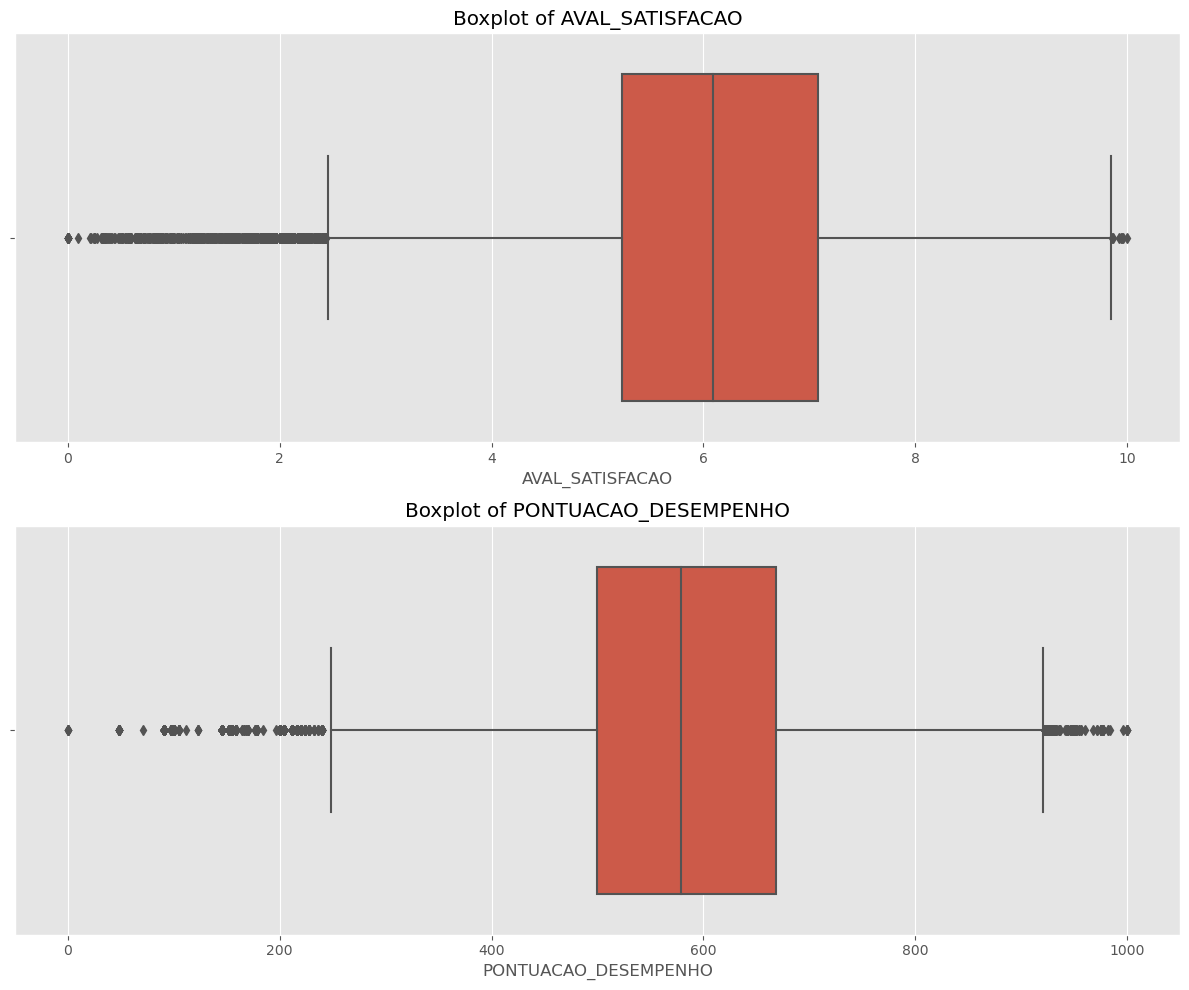

In [8]:
plot.boxplot_subplots((df[['AVAL_SATISFACAO', 'PONTUACAO_DESEMPENHO']]), 2, 1, savename=None)

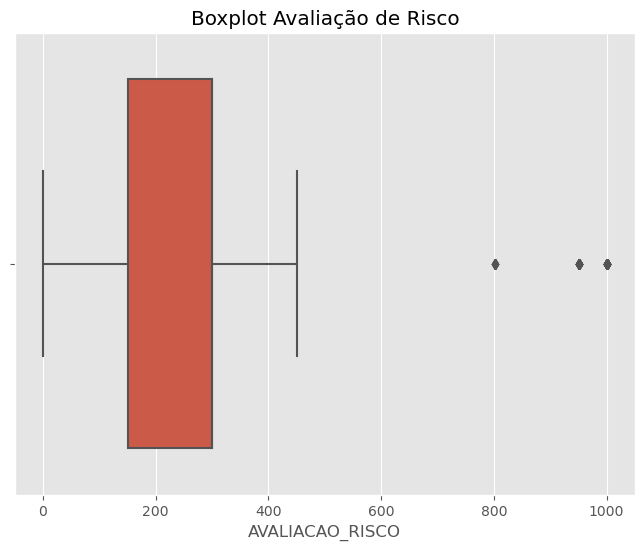

In [9]:
plot.boxplot((df['AVALIACAO_RISCO']), 'Boxplot Avaliação de Risco', savename=None)

In [10]:
Q1 = np.percentile(df['AVAL_SATISFACAO'], 25)
Q3 = np.percentile(df['AVAL_SATISFACAO'], 75)

IQR = Q3 - Q1

inf = Q1 - 1.5 * IQR
sup = Q1 + 1.5 * IQR

print(f"Lower limit (AVAL_SATISFACAO): {inf:.2f}")
print(f"Lower limit (AVAL_SATISFACAO): {sup:.2f}")

Lower limit (AVAL_SATISFACAO): 2.46
Lower limit (AVAL_SATISFACAO): 8.00


In [11]:
lower_outliers_counter = (df['AVAL_SATISFACAO'] < 2.46).sum()

print(f"{lower_outliers_counter} values in the 'AVAL_SATISFACAO' column less than 2.46.")

793 values in the 'AVAL_SATISFACAO' column less than 2.46.


# Distribution

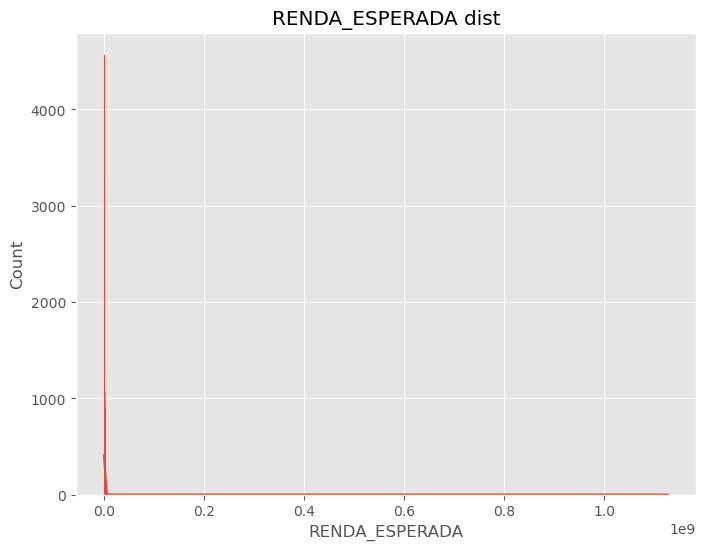

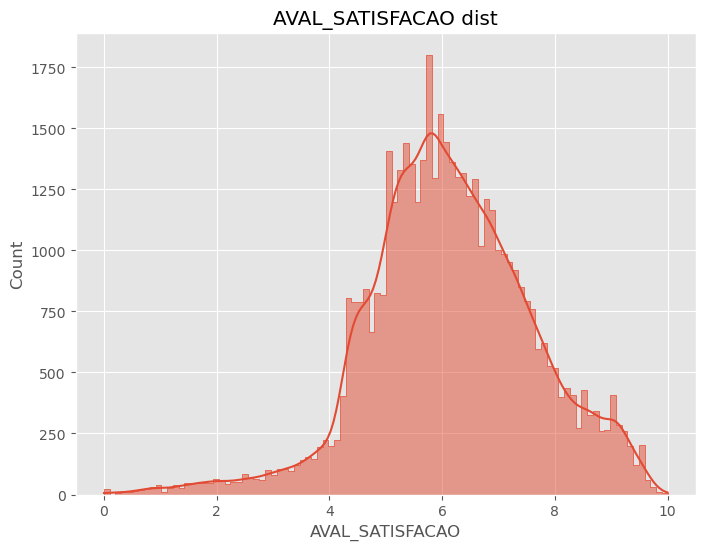

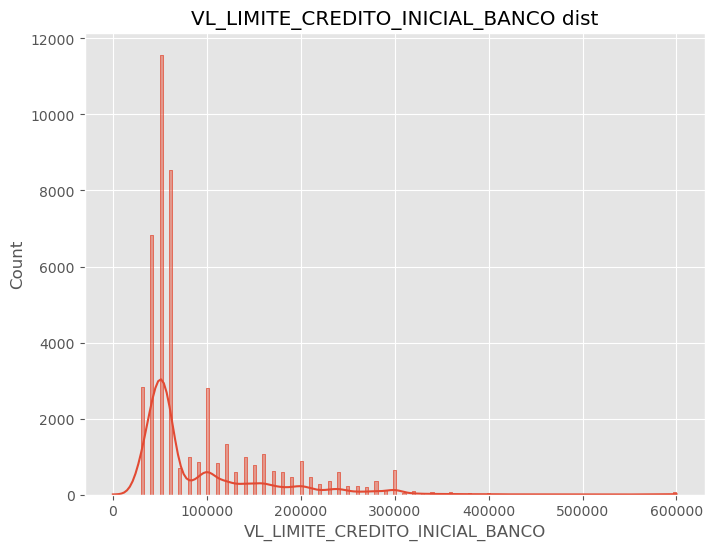

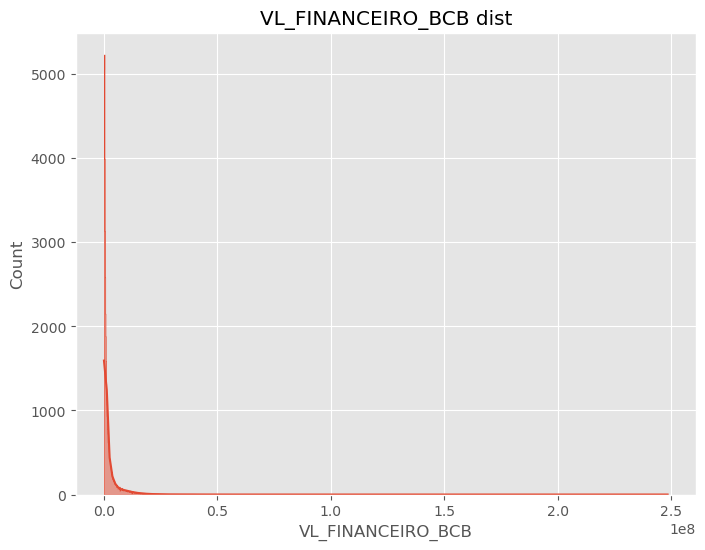

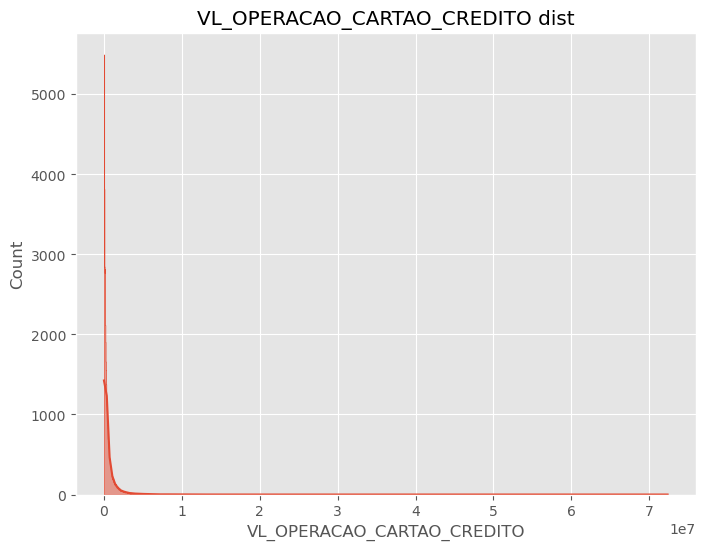

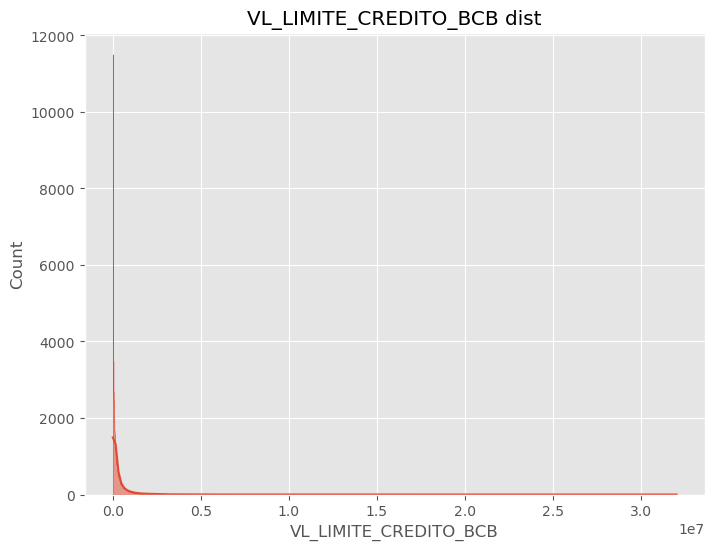

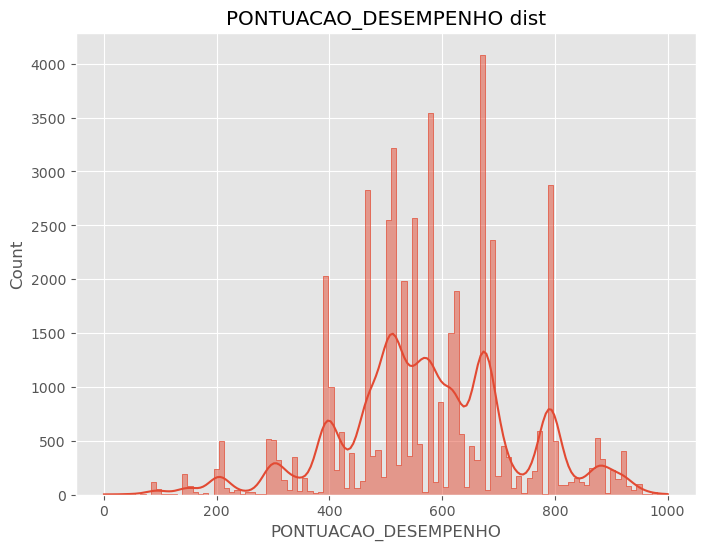

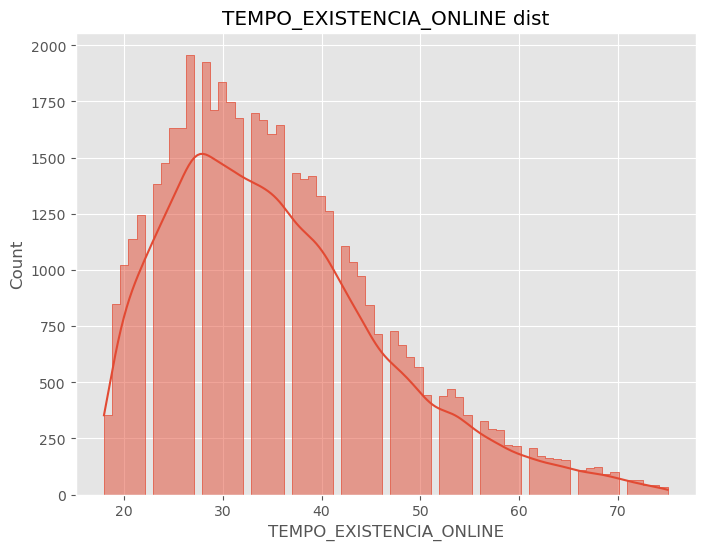

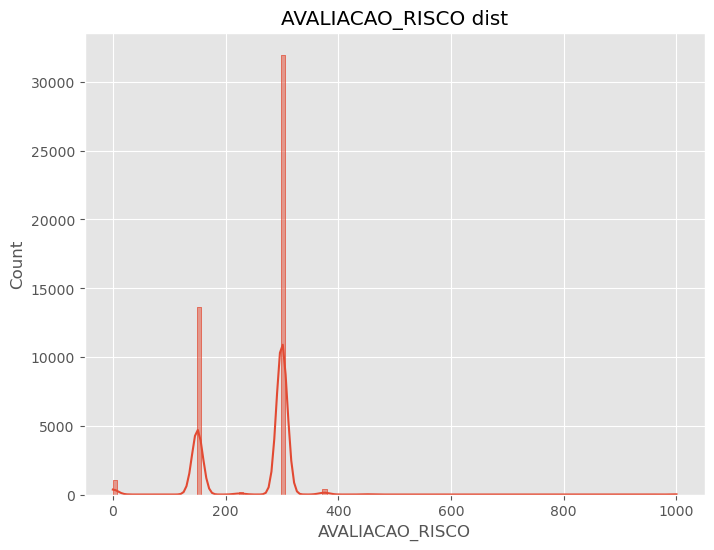

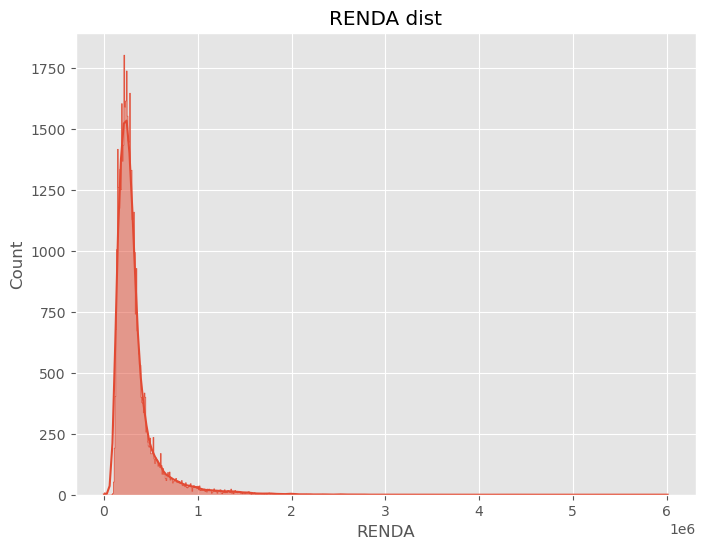

In [12]:
numerical_variables = df[['RENDA_ESPERADA', 'AVAL_SATISFACAO',
       'VL_LIMITE_CREDITO_INICIAL_BANCO', 'VL_FINANCEIRO_BCB',
       'VL_OPERACAO_CARTAO_CREDITO', 'VL_LIMITE_CREDITO_BCB',
       'PONTUACAO_DESEMPENHO', 'TEMPO_EXISTENCIA_ONLINE', 'AVALIACAO_RISCO', 'RENDA']]

if save_dists:
       for variable in numerical_variables:
              plot.distribution(df[variable], title=f'{variable} dist', savename=f'{variable}_dist')
else:
       for variable in numerical_variables:
              plot.distribution(df[variable], title=f'{variable} dist')

# Multicorrelation analysis

In [13]:
correlation_matrix = df.corr()
correlation_matrix

,TIPO_RELACIONAMENTO,ESTADO_LOJA,CATEGORIA_PRODUTO,RENDA_ESPERADA,ESTRATEGIA_VENDAS,AVAL_SATISFACAO,VL_LIMITE_CREDITO_INICIAL_BANCO,REGIAO_LOJA,VL_FINANCEIRO_BCB,VL_OPERACAO_CARTAO_CREDITO,VL_LIMITE_CREDITO_BCB,PONTUACAO_DESEMPENHO,TEMPO_EXISTENCIA_ONLINE,AVALIACAO_RISCO,SCORE_INTERNO,RENDA
TIPO_RELACIONAMENTO,1.000000,0.004484,-0.084514,0.001633,-0.025715,0.066905,-0.005751,0.010261,0.039439,0.013592,0.010878,0.190876,0.178327,-0.019664,0.008078,-0.040608
ESTADO_LOJA,0.004484,1.000000,0.061612,0.004190,0.029061,0.008292,0.099969,0.547389,0.034760,0.000080,0.019413,0.031161,-0.016231,-0.062164,-0.012939,0.118922
CATEGORIA_PRODUTO,-0.084514,0.061612,1.000000,-0.026833,0.061772,-0.107017,0.439442,0.058511,-0.091849,-0.105540,-0.076504,-0.050467,-0.266388,0.032877,-0.029340,-0.013883
RENDA_ESPERADA,0.001633,0.004190,-0.026833,1.000000,-0.007327,0.018168,0.003010,0.002669,0.037161,0.050664,0.028504,0.016327,0.010620,-0.006132,0.013648,0.015115
ESTRATEGIA_VENDAS,-0.025715,0.029061,0.061772,-0.007327,1.000000,-0.040589,-0.002793,0.029146,-0.053199,-0.043284,-0.041240,-0.062976,-0.174867,-0.042021,-0.044165,-0.023221
AVAL_SATISFACAO,0.066905,0.008292,-0.107017,0.018168,-0.040589,1.000000,0.240257,0.006562,0.161218,0.164584,0.209505,0.563869,0.202286,0.002847,0.192664,0.032828
VL_LIMITE_CREDITO_INICIAL_BANCO,-0.005751,0.099969,0.439442,0.003010,-0.002793,0.240257,1.000000,0.084738,0.183252,0.151532,0.171262,0.325174,-0.037127,0.011943,0.180479,0.115921
REGIAO_LOJA,0.010261,0.547389,0.058511,0.002669,0.029146,0.006562,0.084738,1.000000,-0.003036,-0.009076,0.016094,0.026829,-0.001380,-0.038489,-0.010012,0.080187
VL_FINANCEIRO_BCB,0.039439,0.034760,-0.091849,0.037161,-0.053199,0.161218,0.183252,-0.003036,1.000000,0.625849,0.534387,0.147625,0.136067,-0.033011,0.202008,0.102206
VL_OPERACAO_CARTAO_CREDITO,0.013592,0.000080,-0.105540,0.050664,-0.043284,0.164584,0.151532,-0.009076,0.625849,1.000000,0.457457,0.129354,0.086435,-0.008768,0.188912,0.079220


figure saved on  c:\Users\ptons\Code\repositories\datathon\reports\corr_heatmap


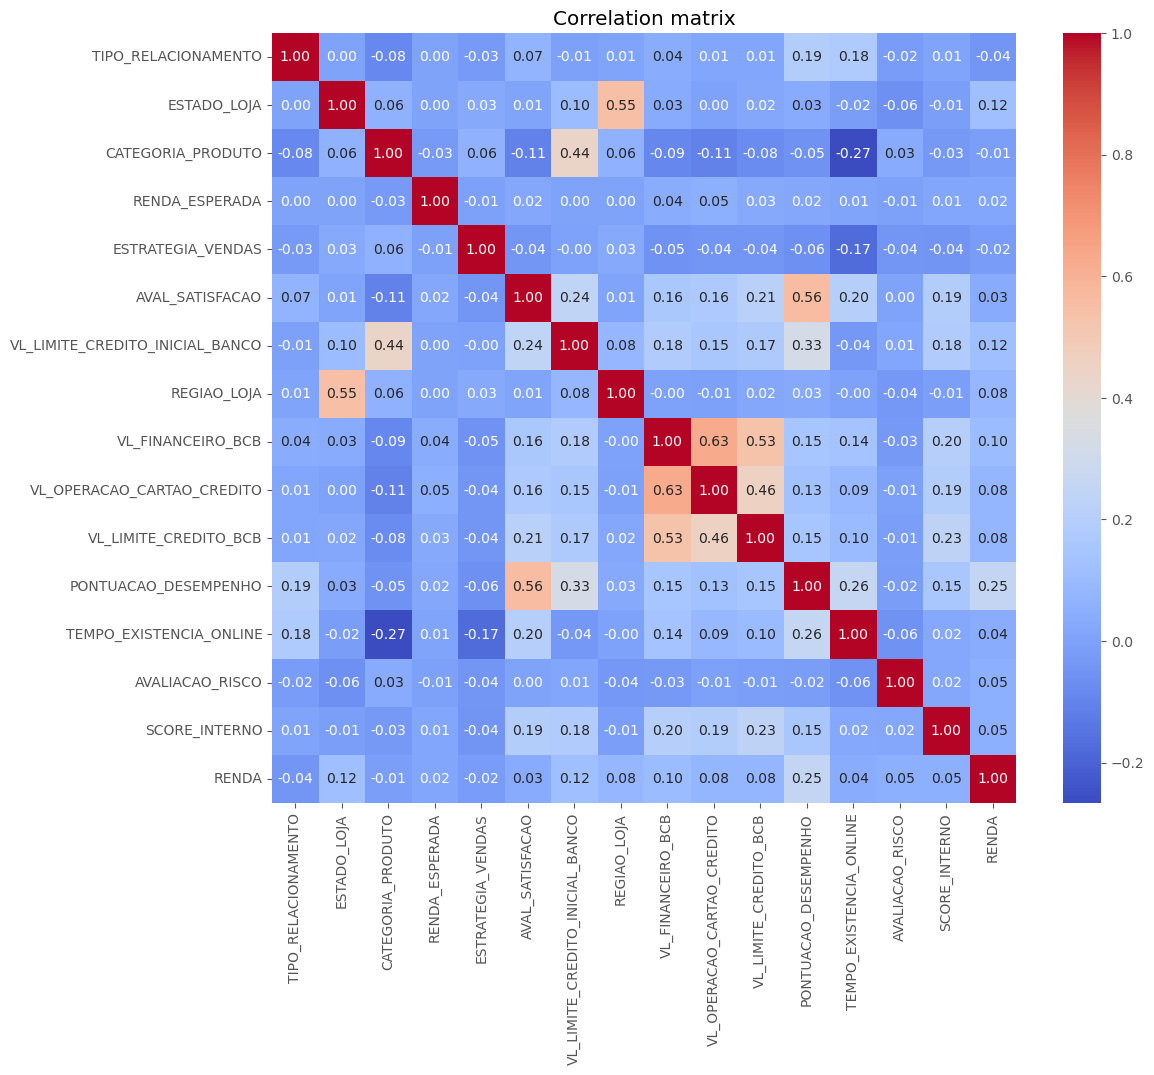

In [14]:
plot.corr_map(correlation_matrix, savename="corr_heatmap")

In [15]:
corr_threshold = 0.5

high_correlation_pairs = correlation_matrix[
    (correlation_matrix > corr_threshold) & (correlation_matrix < 1.0)]

high_correlation_pairs = high_correlation_pairs.unstack().dropna().sort_values(ascending=False)

print(f"Pair of variables with correlation greater than {corr_threshold}:\n")
print(high_correlation_pairs)

Pair of variables with correlation greater than 0.5:

VL_FINANCEIRO_BCB           VL_OPERACAO_CARTAO_CREDITO    0.625849
VL_OPERACAO_CARTAO_CREDITO  VL_FINANCEIRO_BCB             0.625849
AVAL_SATISFACAO             PONTUACAO_DESEMPENHO          0.563869
PONTUACAO_DESEMPENHO        AVAL_SATISFACAO               0.563869
ESTADO_LOJA                 REGIAO_LOJA                   0.547389
REGIAO_LOJA                 ESTADO_LOJA                   0.547389
VL_FINANCEIRO_BCB           VL_LIMITE_CREDITO_BCB         0.534387
VL_LIMITE_CREDITO_BCB       VL_FINANCEIRO_BCB             0.534387
dtype: float64


In [16]:
X_stand = df_stand[['RENDA_ESPERADA', 'AVAL_SATISFACAO',
       'VL_LIMITE_CREDITO_INICIAL_BANCO', 'VL_FINANCEIRO_BCB',
       'VL_OPERACAO_CARTAO_CREDITO', 'VL_LIMITE_CREDITO_BCB',
       'PONTUACAO_DESEMPENHO', 'TEMPO_EXISTENCIA_ONLINE', 'AVALIACAO_RISCO']]

y_stand = df_stand['RENDA']

figure saved on  c:\Users\ptons\Code\repositories\datathon\reports\pca_2d


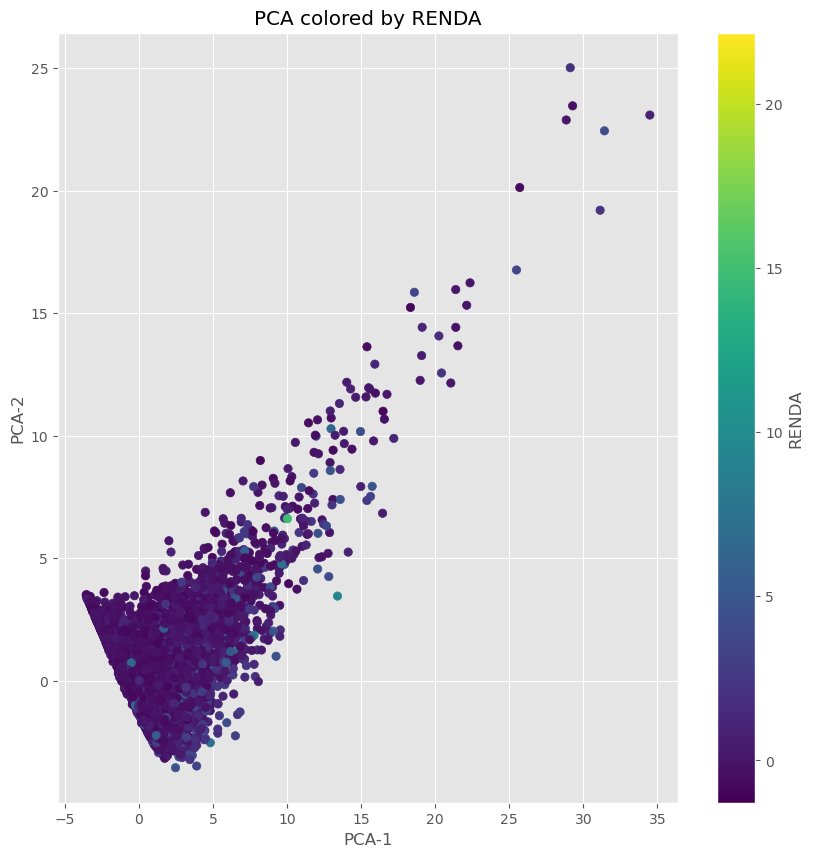

In [17]:
plot.pca_2d(X_stand, y_stand,  savename="pca_2d")

figure saved on  c:\Users\ptons\Code\repositories\datathon\reports\pca_3d


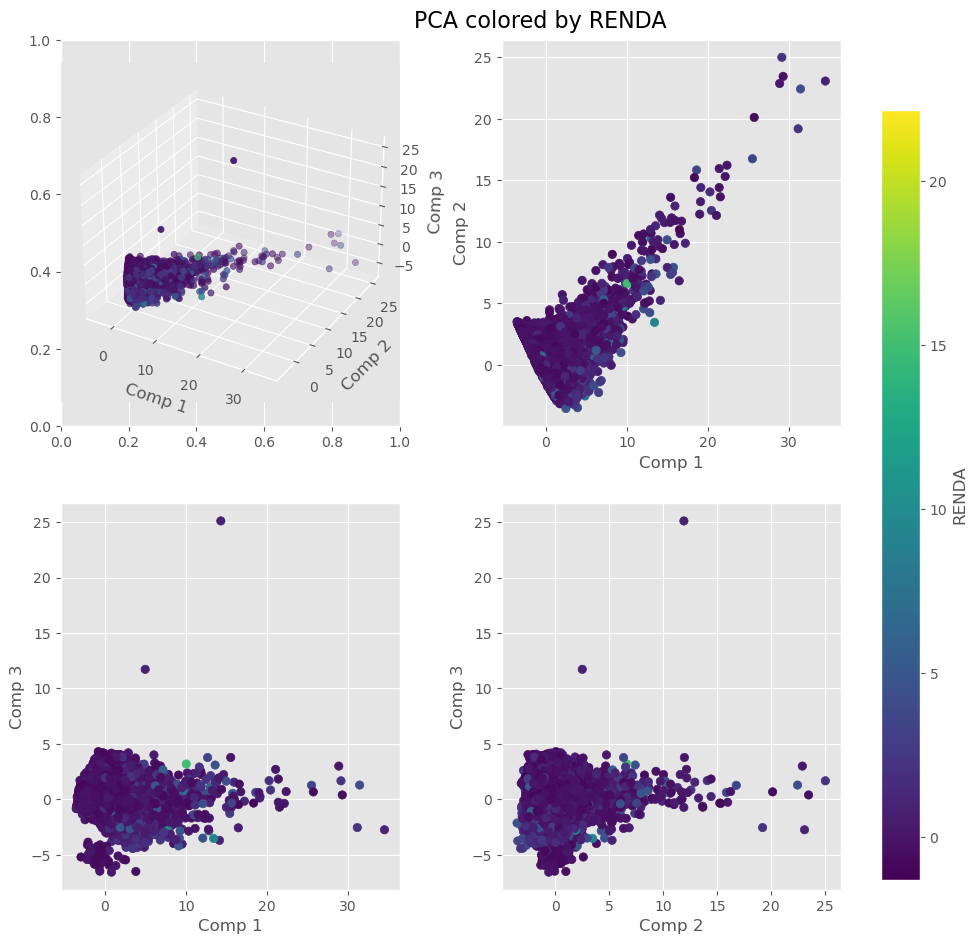

In [18]:
plot.pca_3d(X_stand, y_stand, multiple_graph=True, savename="pca_3d")

# Map analysis

In [19]:
plot.pin_map(df, 'ESTADO_LOJA')

NameError: name 'savename' is not defined

In [ ]:
plot.bubble_map(df, 'ESTADO_LOJA')

# Clustering analysis

In [ ]:
df['TEMPO_EXISTENCIA_ONLINE'].hist()

df['GRUPOS_TEMPO']